# Implementing K-Means using Scikit-Learn

Scikit-Learn provides the `sklearn.cluster` module to enable K-Means Clustering analysis, which you can import.

```py
from sklearn.cluster import KMeans
```

1. create a model and specfiy the number of clusters, `k`.

```py
model = KMeans(n_clusters = k)
```

2. use the `fit()` method to compute K-Means clustering, passing in our dataset `X`.

```py
model.fit(X)
```

3. we can now predict the closest cluster each sample in `X` belongs to, and obtain the labels for the cluster samples

```py
labels = model.predict(X)
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()
samples = iris.data

# Use KMeans() to create a model that finds 3 clusters
model = KMeans(n_clusters = 3)

# Use .fit() to fit the model to samples
model.fit(samples)

# Use .predict() to predict the labels for samples
# we can get the actual labels using iris.target 
labels = model.predict(samples) 

# Print the labels
print(labels)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


With this model, we can now 'feed it' new data samples and predict their labels using the `predict()` method.

Note: Since the cluster centroids are randomly initialized, running the model repeatedly can produce different clusters with the same input data.

Text(0,0.5,'petal length (cm)')

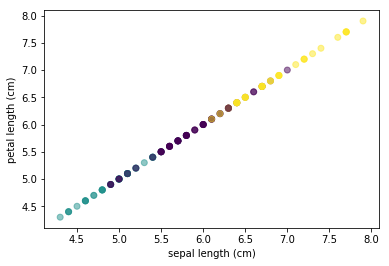

In [2]:
new_samples = np.array([[5.7, 4.4, 1.5, 0.4], [6.5, 3. , 5.5, 0.4], [5.8, 2.7, 5.1, 1.9]])
new_labels = model.predict(new_samples) # predict labels
# print(new_labels) # [0 2 2]

# We can now plot are results, using the `labels` numbers as the colours.
x = samples[:, 0]
y = samples[:, 0]
plt.scatter(x, y, c=labels, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

### Do the clusters correspond to the actual Species

We can get the actual labels for the iris dataset:

In [3]:
target = iris.target
print(target)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


According to the metadata:

 - `0`'s are Iris-setosa
 - `1`'s are Iris-versicolor
 - `2`'s are Iris-virginica
 
We can change the target values to the actual species: 

In [4]:
species = np.chararray(target.shape, itemsize=150)

for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2: 
    species[i] = 'virginica'
  

We will use the Pandas library to perform a cross-tabulation. Cross-tabulations enable you to examine relationships within the data that might not be readily apparent when analyzing total survey responses.

In [5]:
df = pd.DataFrame({'labels': labels, 'species': species}) 
print(df)

     labels       species
0         1     b'setosa'
1         1     b'setosa'
2         1     b'setosa'
3         1     b'setosa'
4         1     b'setosa'
5         1     b'setosa'
6         1     b'setosa'
7         1     b'setosa'
8         1     b'setosa'
9         1     b'setosa'
10        1     b'setosa'
11        1     b'setosa'
12        1     b'setosa'
13        1     b'setosa'
14        1     b'setosa'
15        1     b'setosa'
16        1     b'setosa'
17        1     b'setosa'
18        1     b'setosa'
19        1     b'setosa'
20        1     b'setosa'
21        1     b'setosa'
22        1     b'setosa'
23        1     b'setosa'
24        1     b'setosa'
25        1     b'setosa'
26        1     b'setosa'
27        1     b'setosa'
28        1     b'setosa'
29        1     b'setosa'
..      ...           ...
120       2  b'virginica'
121       0  b'virginica'
122       2  b'virginica'
123       0  b'virginica'
124       2  b'virginica'
125       2  b'virginica'
126       0 

Use the the crosstab() method to perform cross-tabulation:

In [6]:
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0                0             48            14
1               50              0             0
2                0              2            36


### Choosing the Number of Clusters

We knew with the iris data to pick a `k` value of 3 since there are 3 species of iris in the dataset.

How do we pick the number of clusters or `k`? How do we identify a 'good' cluster?

A 'good' cluster is one where the sample data points are bunched together. How spread out the data points are is measured by `inertia` (the tendency to remain unchanged). This is the distance from each data point to the `centroid` of it's cluster. The lower the `inertia` the better our model is. We can check the `inertia` of a model using:

```py
print(model.inertia_)
```

If we plot `k` vs their inertias for the iris data:

![number of clusters](img/number-of-clusters.png)

One method to interpret the graph is to use the `elbow method`. The goal is to have a low inertia with the least number of clusters. We can see that the curve decreases rapidly from `k` of 1 to 2, less so from 2 to 3, and is relatively flat after a `k` of 3, the rate in the decrease of inertia is relatively small. `k` of 3 is the `elbow` in the plot, or the optimal number of clusters - low inertia with the least number of clusters.

In [9]:
# calculate k-means for a series of values of k
num_clusters = [1,2,3,4,5,6,7,8]
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)
print(inertias)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.93873974358974, 34.51155576776165, 29.906856755965457]


Text(0,0.5,'Inertia')

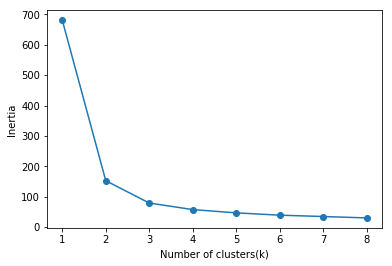

In [10]:
# plot inertias vs clusters
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')

## NOTE: Loading Data

```py
training_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)
```

When loading csv data, files with the `tra` and `tes` have already been split into training and test sets respectively. You will need to load each separetly.